In [11]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy

pd.set_option('display.max_rows', 30)

In [12]:
path = "determinism_check_5_repetitions.json"

with open(path, "r") as f:

    content = json.load(f)
    data = content['_checkpoint']['records']

In [13]:
df = pd.json_normalize(data)

# remove prefices from column name
df.columns = df.columns.str.removeprefix('meta.')
df.columns = df.columns.str.removeprefix('scores.')
# df = df.rename(columns={"index": "route_index"})

interesting_columns = ['route_id', 'status', 'duration_game', 'duration_system',
                       'route_length', 'score_composed', 'score_penalty', 'score_route']
df = df[interesting_columns]

# Strip prefix
df['route_id'] = df['route_id'].str.removeprefix("RouteScenario_")

# Make a numerical column
df['route_id'] = pd.to_numeric(df['route_id'])

# normalize data to be in range [0, max]
df['route_id'] -= df['route_id'].min()
df

,route_id,status,duration_game,duration_system,route_length,score_composed,score_penalty,score_route
0,0,Failed - Agent timed out,917.050014,2379.693600,1071.028134,18.986971,0.6,31.644952
1,0,Failed - Agent timed out,917.050014,2461.462698,1071.028134,24.663211,0.6,41.105352
2,0,Completed,804.600012,2055.182759,1071.028134,60.000000,0.6,100.000000
3,0,Completed,865.100013,2356.126006,1071.028134,100.000000,1.0,100.000000
4,0,Failed - Agent timed out,917.050014,2406.561749,1071.028134,49.890399,0.6,83.150665
...,...,...,...,...,...,...,...,...
45,9,Completed,1129.250017,2973.255361,1554.578340,50.000000,0.5,100.000000
46,9,Failed - Agent timed out,1321.050020,3369.182570,1554.578340,46.931320,0.6,78.218867
47,9,Failed - Agent timed out,1321.050020,3153.749843,1554.578340,45.007147,1.0,45.007147
48,9,Failed - Agent timed out,1321.050020,3464.417751,1554.578340,72.871752,1.0,72.871752


## Q1. Does score change for diffrent repetitions of same scenario

Text(0.5, 1.0, '')

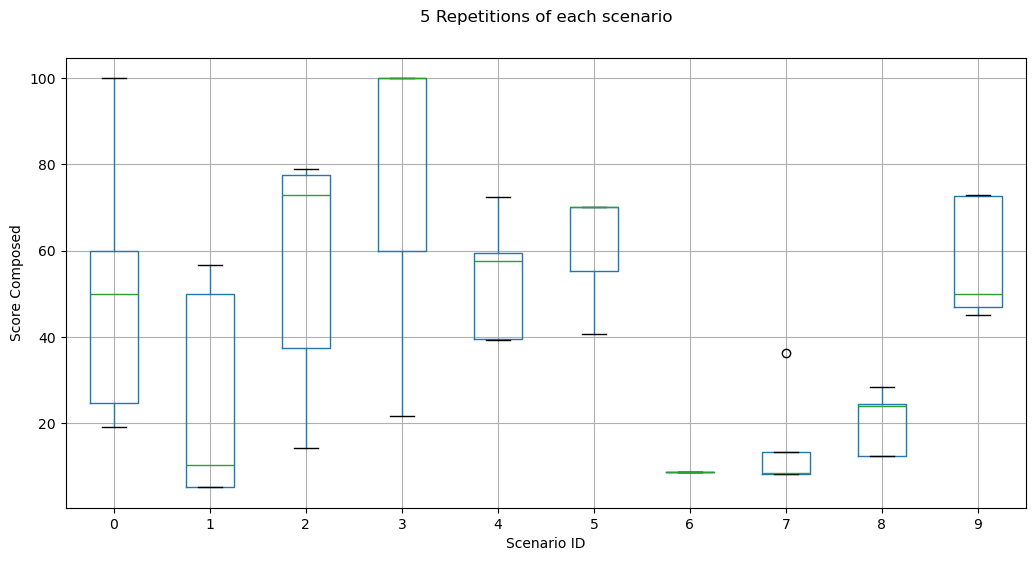

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

df.boxplot(column=['score_composed'],
           by='route_id', ax=ax)
fig.suptitle("5 Repetitions of each scenario")

ax.set_ylabel("Score Composed")
ax.set_xlabel("Scenario ID")
ax.set_title("")

### Variance for each scenario

In [15]:
df.groupby('route_id')['score_composed'].var()

route_id
0    1050.316425
1     660.782225
2     839.085617
3    1235.712000
4     204.204034
5     173.788885
6       0.000000
7     148.133766
8      54.936317
9     198.219577
Name: score_composed, dtype: float64

## Conclusion:
ADS is not deterministic
